The dataset contains two coloumns which has the number of hours the student studied and the marks of the student


we are using linear regression model, the model predicts the marks of student based on the number of hours the student studied.

it uses the formula y=mx+c

if the student's study hour more then the marks of the student will be more.



In [8]:
import pandas as pd

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
import seaborn as sns

In [11]:
df=pd.read_csv("student_info.csv")

In [12]:
df

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
...,...,...
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05


In [13]:
df1=pd.read_csv("student_scores.csv")

In [14]:
df1

,"Hours,Scores"
0,"2.5,21"
1,"5.1,47"
2,"3.2,27"
3,"8.5,75"
4,"3.5,30"
5,"1.5,20"
6,"9.2,88"
7,"5.5,60"
8,"8.3,81"
9,"2.7,25"


In [15]:
df1.head()

,"Hours,Scores"
0,"2.5,21"
1,"5.1,47"
2,"3.2,27"
3,"8.5,75"
4,"3.5,30"


In [16]:
df1.shape

(25, 1)

In [17]:
df.shape

(200, 2)

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Hours,Scores  25 non-null     object
dtypes: object(1)
memory usage: 328.0+ bytes


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


Text(0.5, 1.0, 'study_hours vs student_marks')

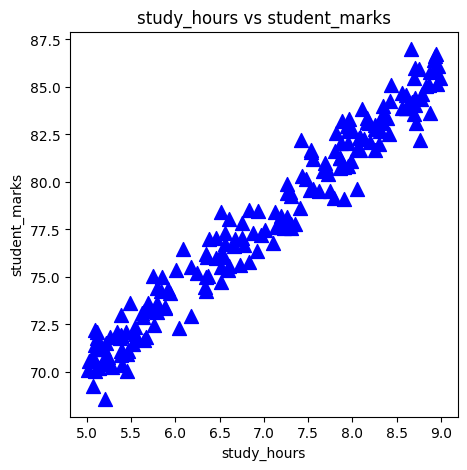

In [20]:
plt.figure(figsize=(5,5))
plt.scatter(x=df.study_hours,y=df.student_marks, color="blue",marker="^",s=100,alpha=1)
plt.xlabel("study_hours")
plt.ylabel("student_marks")

plt.title("study_hours vs student_marks")

In [21]:
df.isnull()

,study_hours,student_marks
0,False,False
1,False,False
2,True,False
3,False,False
4,False,False
...,...,...
195,False,False
196,False,False
197,False,False
198,False,False


In [22]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [23]:
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

we can add mean values to null values

In [24]:
df2=df.fillna(df.mean())

In [25]:
df2

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19
...,...,...
195,7.530000,81.67
196,8.560000,84.68
197,8.940000,86.75
198,6.600000,78.05


In [26]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

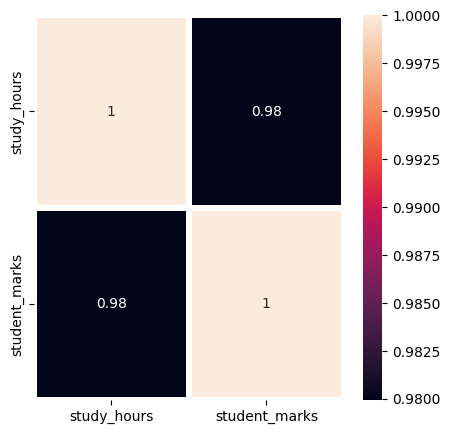

In [27]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True,linewidths=3)
plt.show()

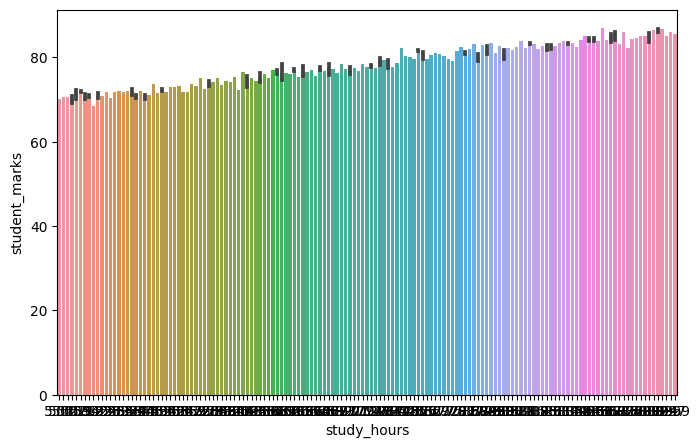

In [28]:

plt.figure(figsize=(8,5))
sns.barplot(x="study_hours",y="student_marks",data=df2)
plt.show()


In [29]:
X=df2.drop("student_marks",axis="columns")
y=df2.drop("study_hours",axis="columns")

In [30]:
X

,study_hours
0,6.830000
1,6.560000
2,6.995949
3,5.670000
4,8.670000
...,...
195,7.530000
196,8.560000
197,8.940000
198,6.600000


In [31]:
y

,student_marks
0,78.50
1,76.74
2,78.68
3,71.82
4,84.19
...,...
195,81.67
196,84.68
197,86.75
198,78.05


In [32]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=51)
print("shape of X_train =",X_train.shape)
print("shape of y_train =",y_train.shape)
print("shape of X_test =",X_test.shape)
print("shape of y_test =",y_test.shape)

shape of X_train = (160, 1)
shape of y_train = (160, 1)
shape of X_test = (40, 1)
shape of y_test = (40, 1)


In [33]:
from sklearn.linear_model import LinearRegression


In [34]:
lr=LinearRegression()

In [35]:
lr.fit(X_train,y_train)

LinearRegression()

In [36]:
M=lr.coef_


linear_model
y=mx+c

In [37]:
m=M

In [38]:
C=lr.intercept_

In [39]:
c=C

In [40]:
y=m*5+c

In [41]:
y


array([[70.12594512]])

In [42]:
y_pred=lr.predict(X_test)

In [43]:
y_pred

array([[83.11381458],
       [78.9025963 ],
       [84.57003024],
       [85.82946001],
       [84.72745896],
       [80.75238377],
       [72.84159055],
       [71.66087515],
       [73.23516235],
       [71.66087515],
       [73.47130543],
       [76.38373677],
       [73.23516235],
       [73.58937697],
       [82.95638585],
       [70.40144538],
       [73.23516235],
       [78.74516758],
       [75.55723598],
       [82.68088559],
       [76.65923703],
       [70.48015974],
       [74.77009238],
       [77.98143645],
       [85.59331693],
       [82.56281405],
       [76.42309395],
       [85.0423164 ],
       [78.39095296],
       [81.38209865],
       [81.73631327],
       [83.15317176],
       [82.20859943],
       [81.10659839],
       [73.58937697],
       [71.1492318 ],
       [71.89701823],
       [81.53952737],
       [72.60544747],
       [71.93637541]])

In [44]:
final=pd.DataFrame(np.c_[X_test,y_test,y_pred],columns=["study_hours","student_marks_original Percentage","student_marks_predicted Percentage"])


In [45]:
final

,study_hours,student_marks_original Percentage,student_marks_predicted Percentage
0,8.300000,82.02,83.113815
1,7.230000,77.55,78.902596
2,8.670000,84.19,84.570030
3,8.990000,85.46,85.829460
4,8.710000,84.03,84.727459
5,7.700000,80.81,80.752384
6,5.690000,73.61,72.841591
7,5.390000,70.90,71.660875
8,5.790000,73.14,73.235162
9,5.390000,73.02,71.660875


In [46]:
lr.score(X_test,y_test)                  #Getting 95% Accuracy


0.9514124242154466

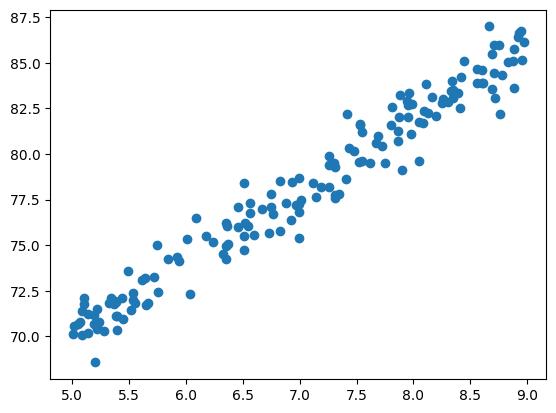

In [47]:
plt.scatter(X_train,y_train)


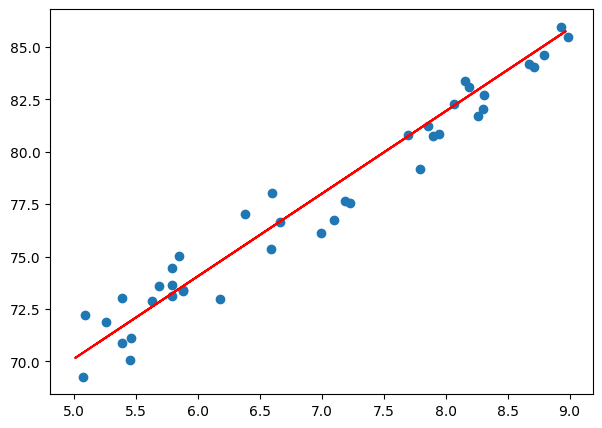

In [48]:
plt.figure(figsize=(7,5))
plt.scatter(X_test,y_test)
plt.plot(X_train,lr.predict(X_train),color="red")


prediction on new instance


In [49]:
lr.predict([[8]])[0][0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


81.93309917012903

In [50]:
lr.predict([[4]])[0][0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


66.19022710353573